In [12]:
from loading import *

In [13]:
loc = 2

In [14]:
M = data_points[loc]
Rvir = rvir[loc] / 1000
Rs = rs[loc] / 1000
cvir = Rvir/Rs

X, Y, Z = x[loc], y[loc], z[loc]
arr_points_2 = get_points(X, Y, Z, arr_points)

R = compute_R2(arrays(arr_points_2, X, Y, Z, 1))
pairs, _ = np.histogram(R, bins=RADIUS_BINS)
total_mass = np.array(pairs) * MASS * (100 / PERCENT)

volume = Volume(1)

obs = total_mass / volume

In [15]:
cvir, Rs

(4.802778366268775, 0.16147799682617187)

In [16]:
mask = np.where(RADIUS < rvir[loc] / 1000)
obs = obs[mask]

In [17]:
np.log10(M), obs

(13.721233376312444,
 array([2.04728023e+16, 1.20972434e+16, 8.51562390e+15, 6.29225145e+15,
        4.02481952e+15, 2.52850781e+15, 1.58564558e+15, 9.05537518e+14,
        5.45034224e+14, 3.47679278e+14, 2.08335399e+14, 1.09940358e+14,
        5.75625583e+13, 3.11987535e+13, 1.54745066e+13, 8.16130283e+12]))

In [19]:
c_inv = cinv(obs, 0.25, 2)

In [28]:
cvirs = np.linspace(np.log(1), np.log(30), 1000)
# cvirs = [np.log(cvir)]

In [21]:
b = np.array([])
for c in cvirs:
    # print(c, np.exp(c))
    cos = cost(c, obs, c_inv, M, Rvir)
    b = np.append(b, cos)

In [22]:
optres = iminuit.minimize(cost, [np.log(10)], args=(obs, c_inv, M, Rvir))
optres.x

array([1.75218465])

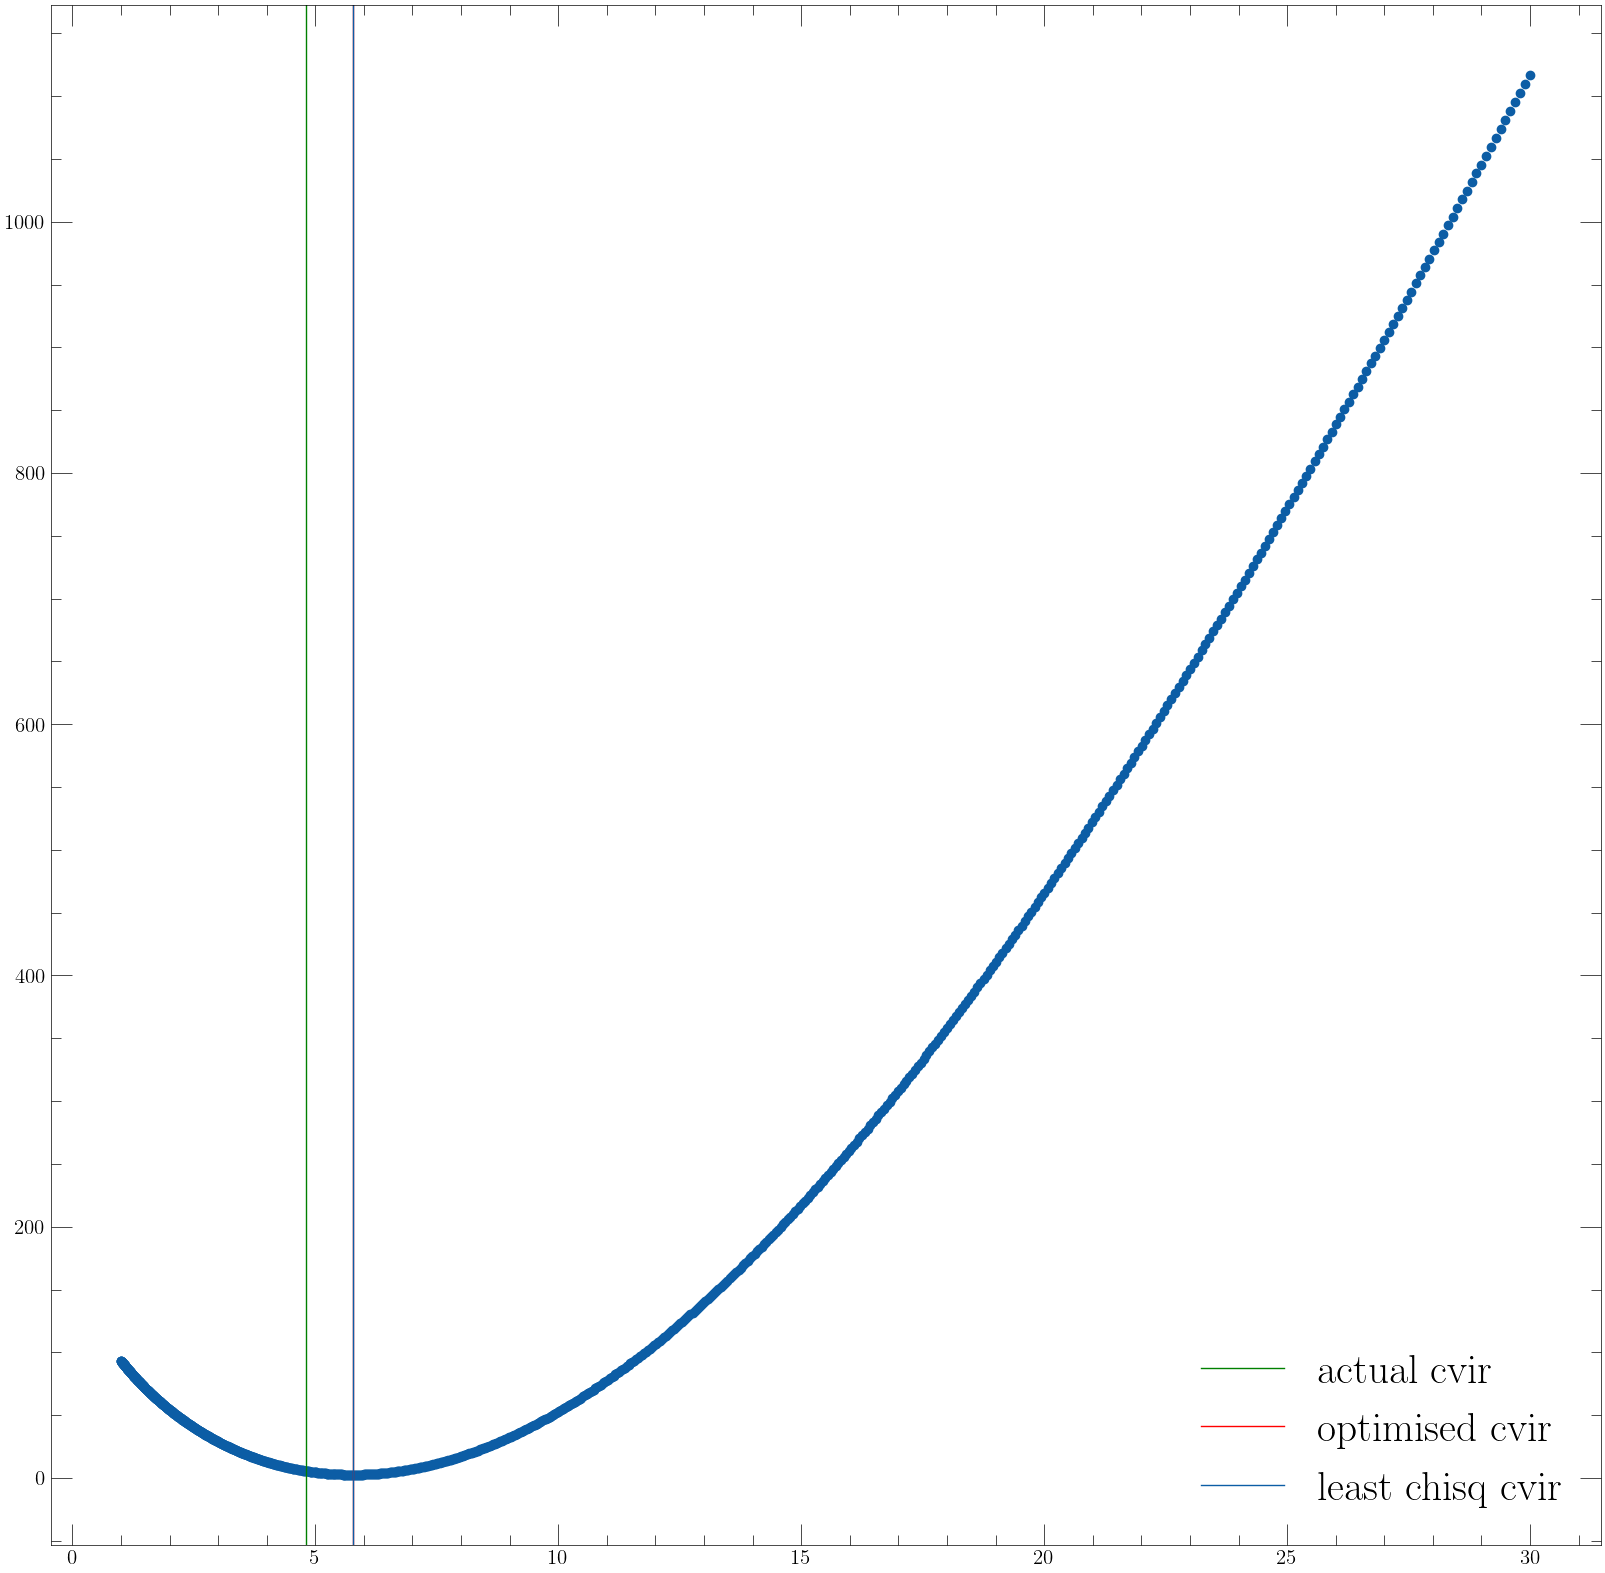

In [23]:
plt.scatter(np.exp(cvirs), b)
plt.axvline(cvir, c='g', label='actual cvir')
plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
# plt.ylim(0, 1200)
plt.legend()


In [24]:
bl = np.array([])
for c in cvirs:
    # print(c, np.exp(c))
    cos = cost(c, obs, c_inv, M, Rvir, 'lorentz')
    bl = np.append(bl, cos)

optresl = iminuit.minimize(cost, [np.log(10)], args=(obs, c_inv, M, Rvir, 'lorentz'))
np.exp(optresl.x)

array([5.75802029])

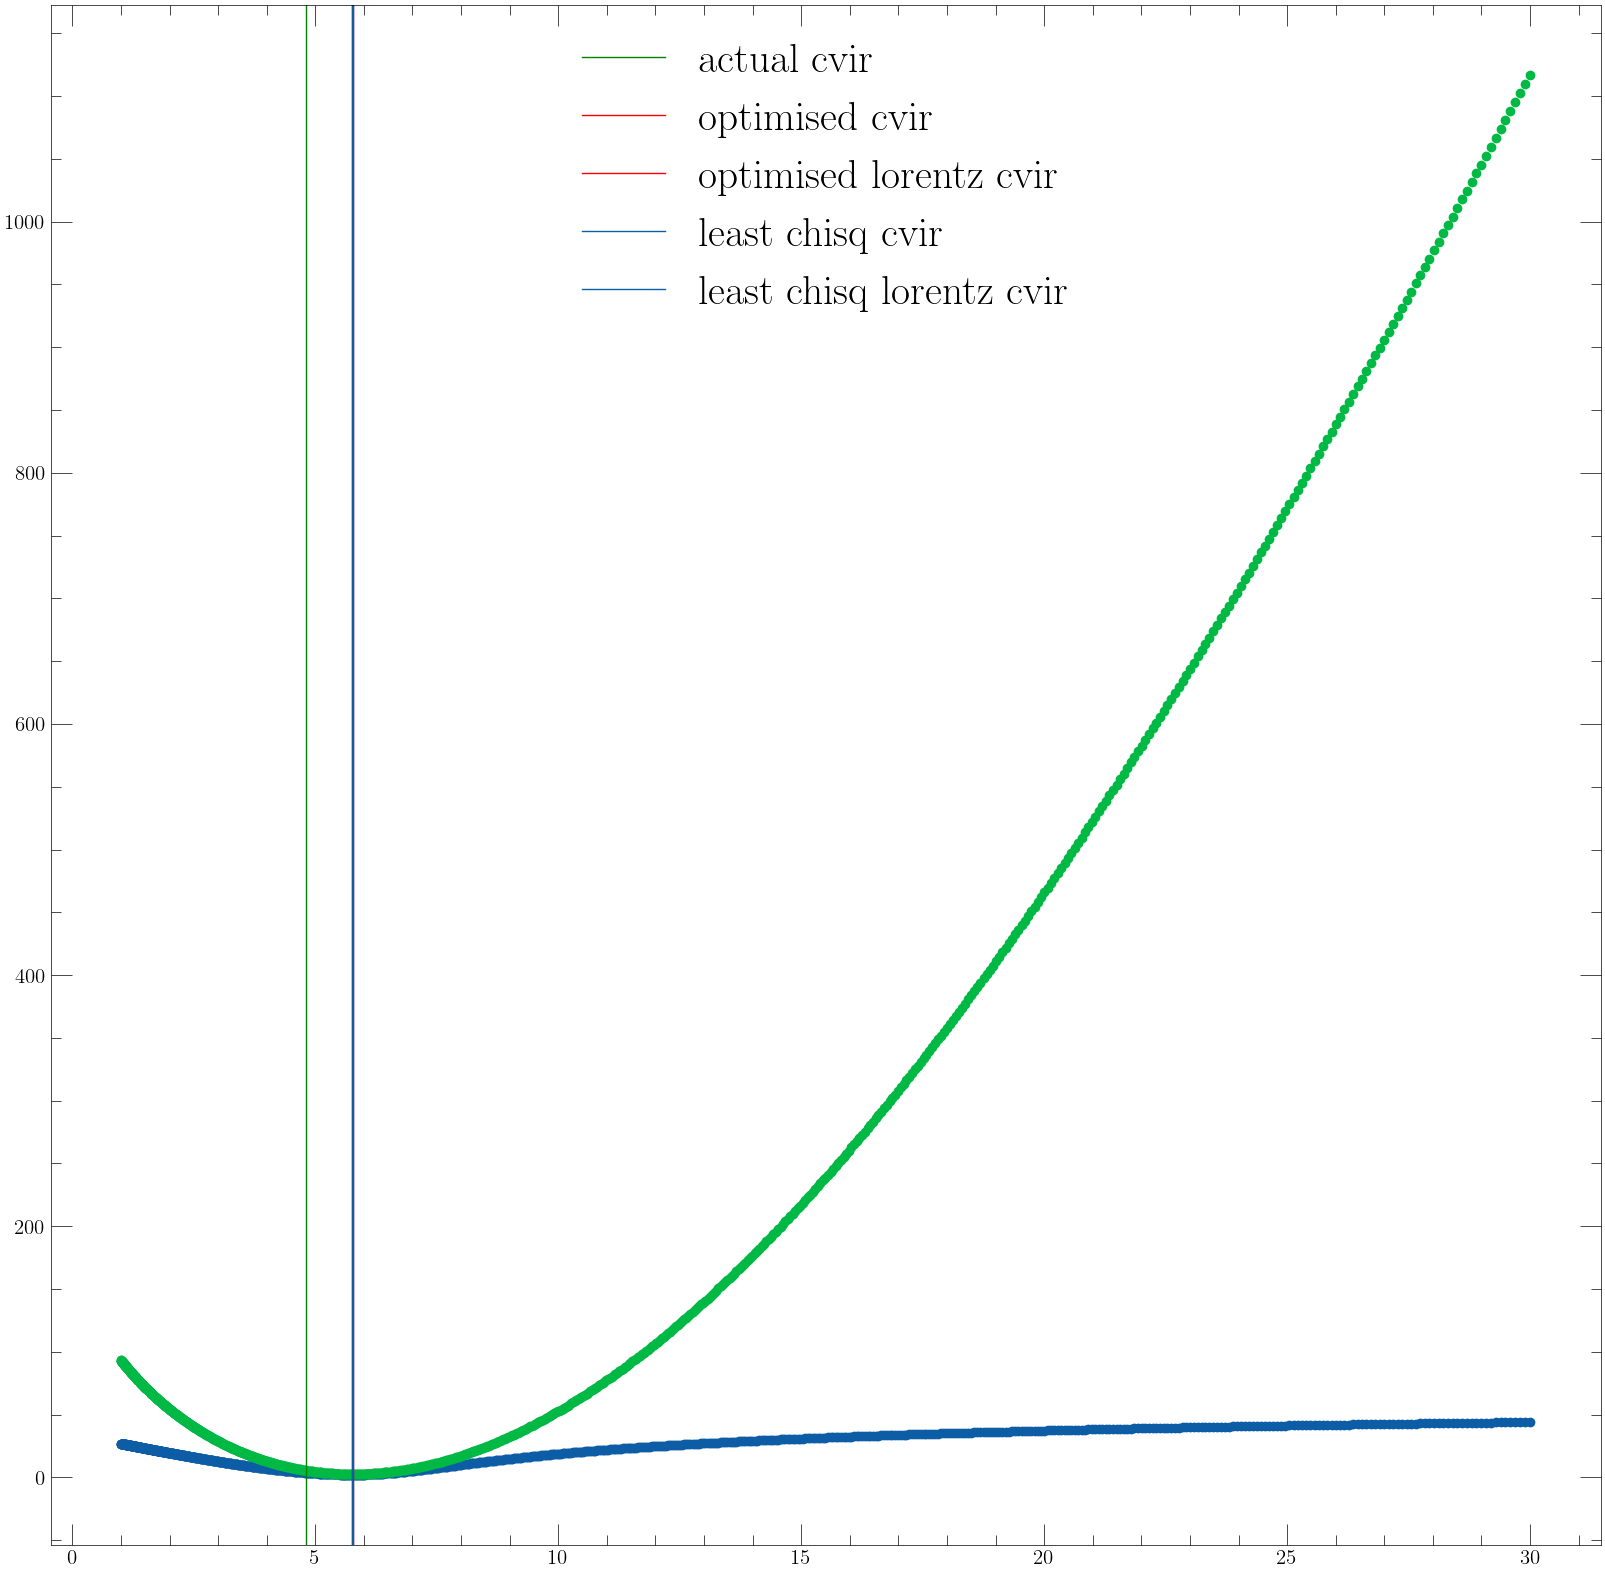

In [41]:
plt.scatter(np.exp(cvirs), bl)
plt.scatter(np.exp(cvirs), b)
plt.axvline(cvir, c='g', label='actual cvir')
plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
plt.axvline(np.exp(optresl.x), c='r', label='optimised lorentz cvir')
plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
plt.axvline(np.exp(cvirs)[np.argmin(bl)], label='least chisq lorentz cvir')
plt.ylim(0, 50)
plt.xlim(0, 30)
plt.legend()

In [45]:
ba = np.array([])
c_inv = cinv(obs, 0.25, 1)
for c in cvirs:
    # print(c, np.exp(c))
    cos = cost(c, obs, c_inv, M, Rvir, 'abs')
    ba = np.append(ba, cos)

optresa = iminuit.minimize(cost, [np.log(10)], args=(obs, c_inv, M, Rvir, 'abs'))
np.exp(optresa.x)

array([5.92164793])

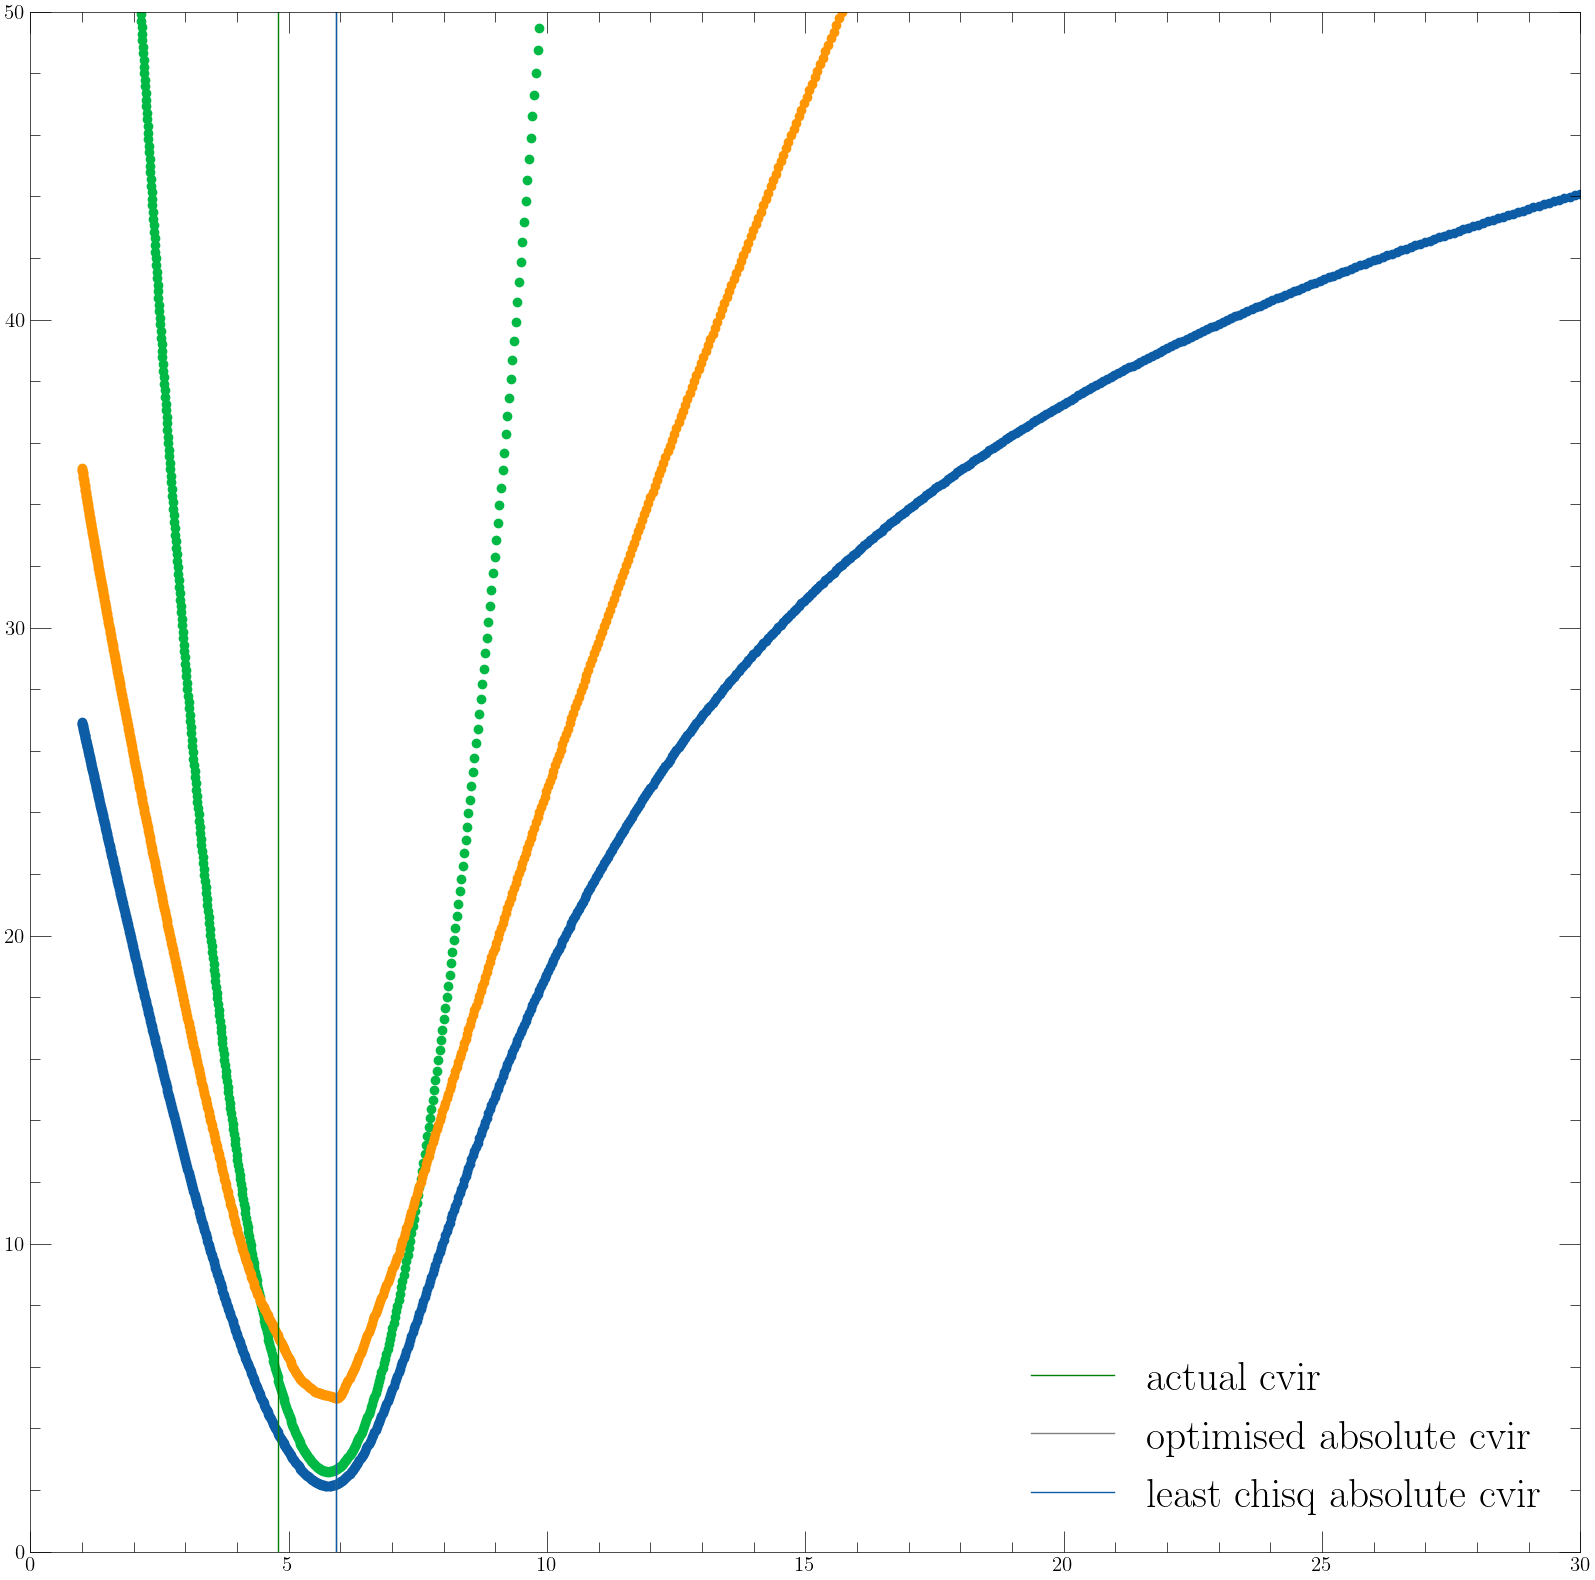

In [47]:
plt.scatter(np.exp(cvirs), bl)
plt.scatter(np.exp(cvirs), b)
plt.scatter(np.exp(cvirs), ba)
plt.axvline(cvir, c='g', label='actual cvir')
# plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
# plt.axvline(np.exp(optresl.x), c='b', label='optimised lorentz cvir')
plt.axvline(np.exp(optresa.x), c='gray', label='optimised absolute cvir')
# plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
# plt.axvline(np.exp(cvirs)[np.argmin(bl)], label='least chisq lorentz cvir')
plt.axvline(np.exp(cvirs)[np.argmin(ba)], label='least chisq absolute cvir')
plt.ylim(0, 50)
plt.xlim(0, 30)
plt.legend()

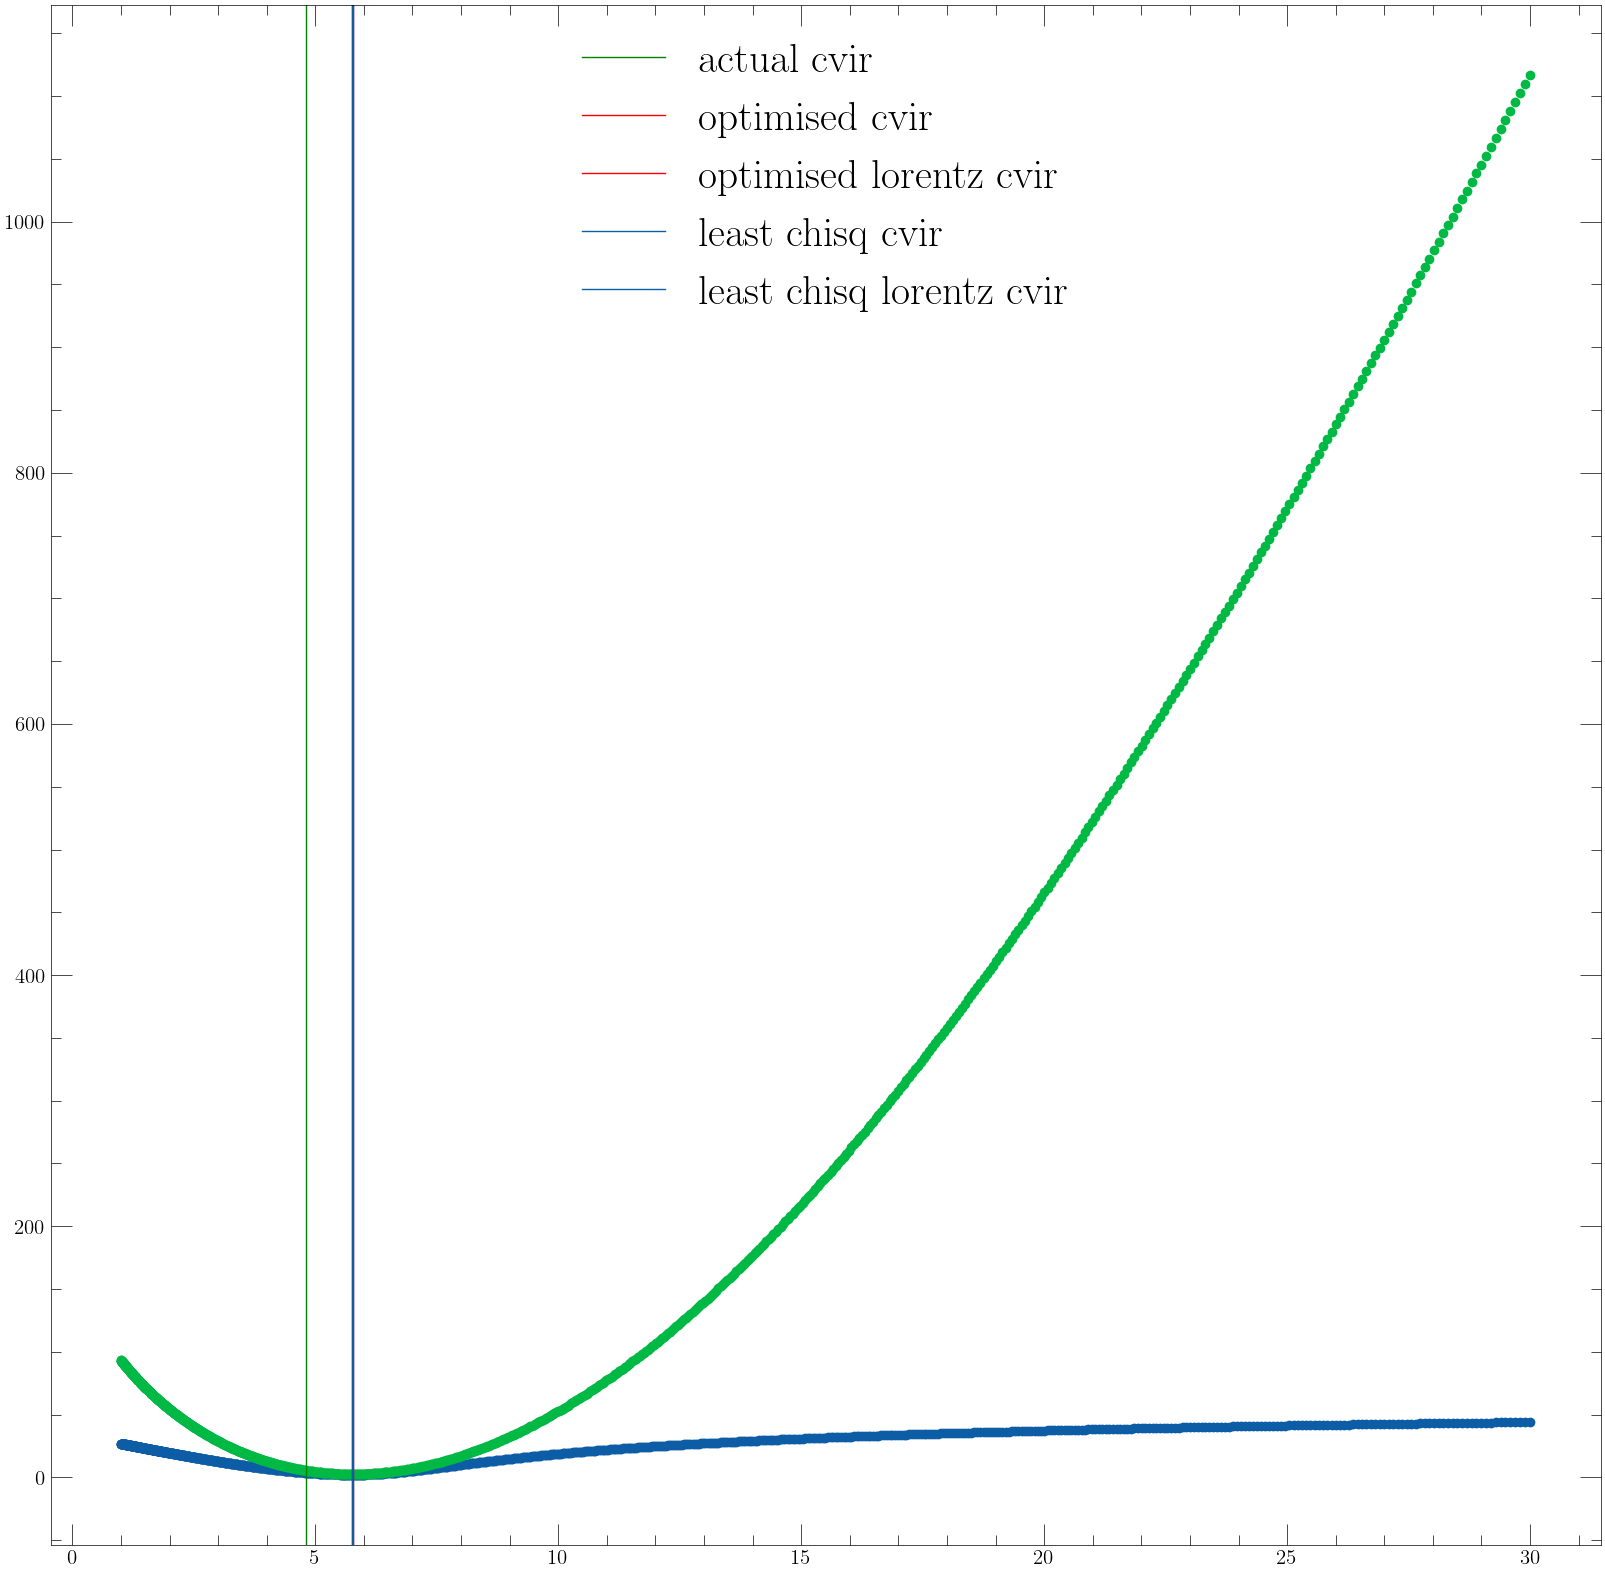

In [62]:
plt.scatter(np.exp(cvirs), bl)
plt.scatter(np.exp(cvirs), b)
plt.axvline(cvir, c='g', label='actual cvir')
plt.axvline(np.exp(optres.x), c='r', label='optimised cvir')
plt.axvline(np.exp(optresl.x), c='r', label='optimised lorentz cvir')
plt.axvline(np.exp(cvirs)[np.argmin(b)], label='least chisq cvir')
plt.axvline(np.exp(cvirs)[np.argmin(bl)], label='least chisq lorentz cvir')
# plt.ylim(0, 1200)
plt.legend()

In [63]:
np.exp(optres.x), np.exp(optresl.x)

(array([5.76718819]), array([5.75802029]))